In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
startups = pd.read_csv("C:/Users/khann/OneDrive/Desktop/excel r assignments/50_Startups.csv")
startups.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#check for missing values
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup= startups.rename({'R&D Spend': 'RandD_Spend','Marketing Spend':'Marketing_Spend'}, axis=1)

# Correlation Matrix

In [6]:
startup.corr()

,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

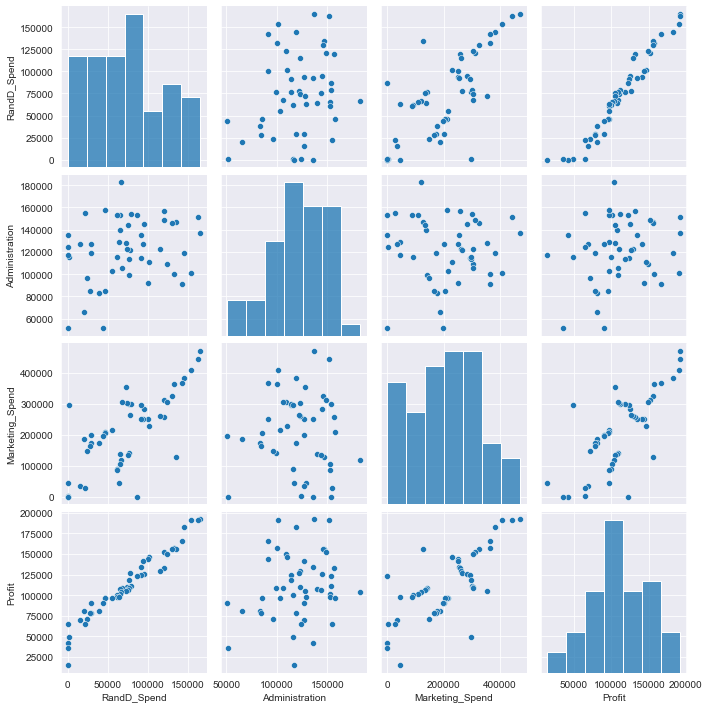

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

# Preparing a model

In [8]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols(' Profit~ Administration+ RandD_Spend+ Marketing_Spend',data= startup).fit()

In [9]:
#Coefficients
model.params

Intercept          50122.192990
Administration        -0.026816
RandD_Spend            0.805715
Marketing_Spend        0.027228
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
Administration     -0.525507
RandD_Spend        17.846374
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
Administration     6.017551e-01
RandD_Spend        2.634968e-22
Marketing_Spend    1.047168e-01
dtype: float64


In [11]:
#R squared values
S1=(model.rsquared,model.rsquared_adj)
print(S1)

(0.9507459940683246, 0.9475337762901719)


# Simple Linear Regression Models

In [12]:
ml_v=smf.ols('Profit~RandD_Spend',data = startup).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept      19.320288
RandD_Spend    29.151139
dtype: float64 
 Intercept      2.782697e-24
RandD_Spend    3.500322e-32
dtype: float64


In [13]:
ml_w=smf.ols('Profit~Marketing_Spend',data = startup).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [14]:
ml_wv=smf.ols('Profit~RandD_Spend+Marketing_Spend',data = startup).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept          17.463582
RandD_Spend        19.265555
Marketing_Spend     1.927052
dtype: float64 
 Intercept          3.504062e-22
RandD_Spend        6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64


# Calculating VIF

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

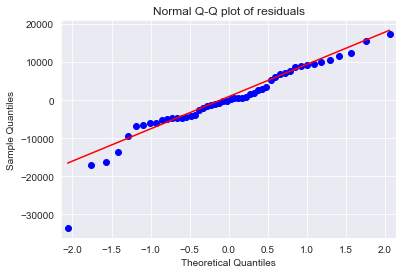

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [17]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

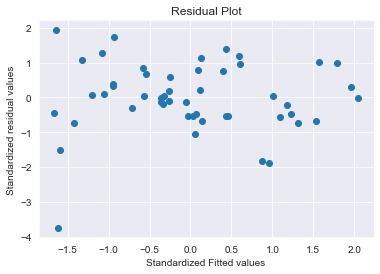

In [18]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

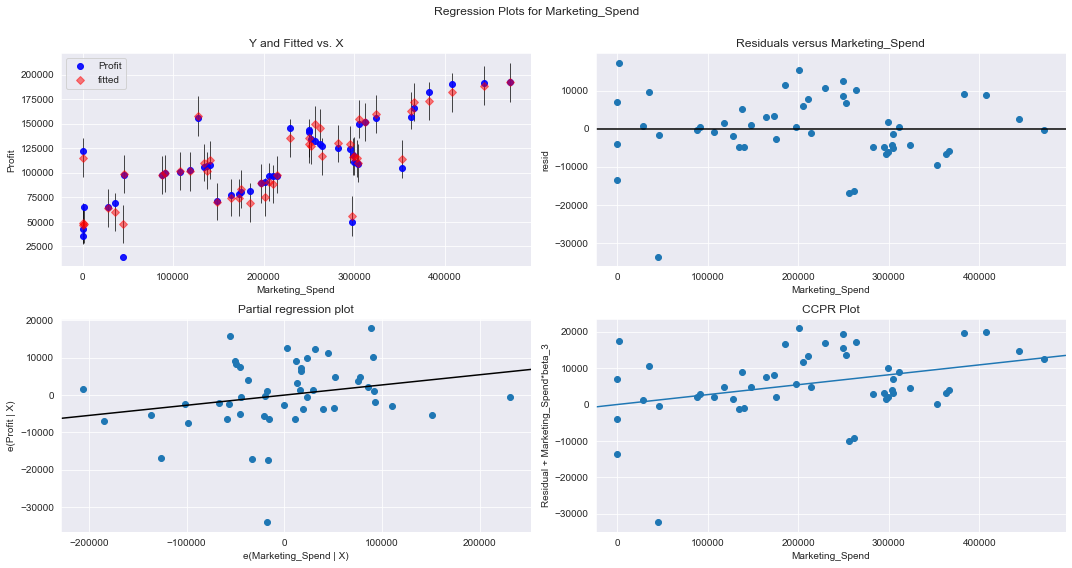

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

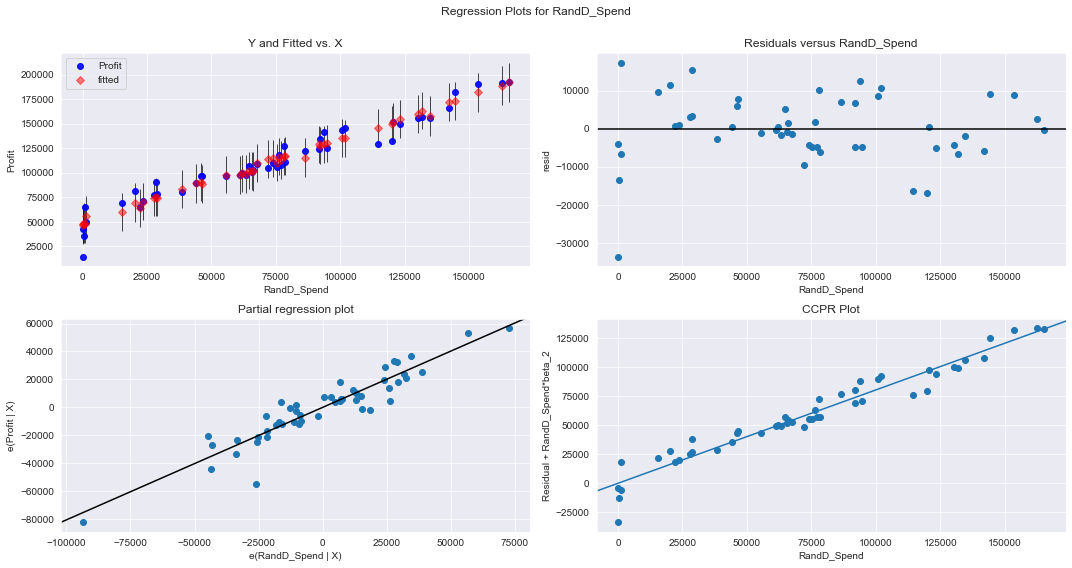

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RandD_Spend", fig=fig)
plt.show()

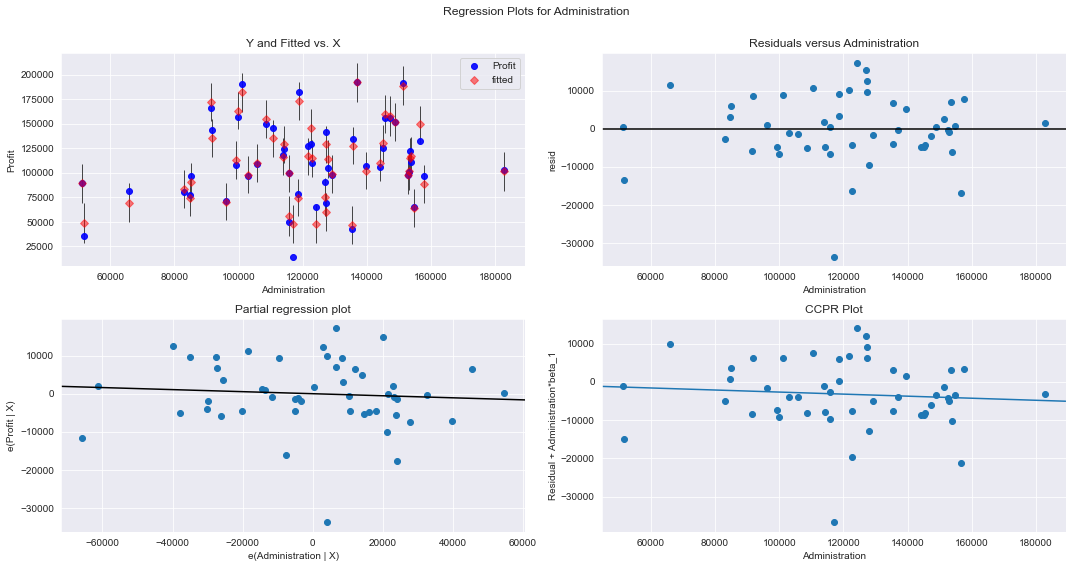

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [22]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

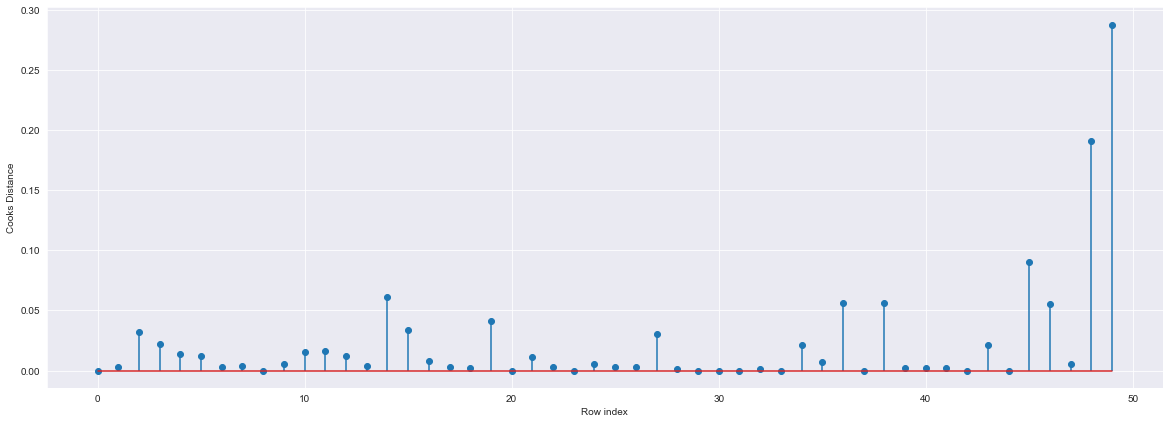

In [23]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543255)

## High Influence points

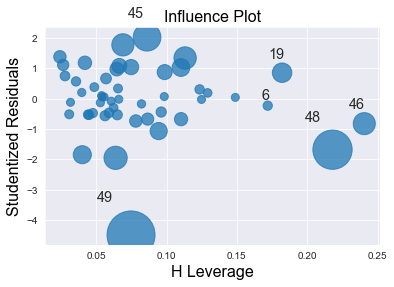

In [25]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [26]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that data point 48and 49 are the influencers

In [27]:
startup[startup.index.isin([48,49])]

,RandD_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [28]:
#See the differences in HP and other variable values
startup.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [29]:
#Load the data
startup_new = startup

In [30]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup1=startup_new.drop(startup_new.index[[48,49]],axis=0).reset_index()

In [31]:
#Drop the original index
startup1=startup1.drop(['index'],axis=1)

In [32]:
startup1

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [33]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~Administration+RandD_Spend+Marketing_Spend',data = startup1).fit()

In [34]:
S2=(final_ml_V.rsquared,final_ml_V.aic)
print(S2)

(0.9626766170294074, 994.6690439260116)


##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [35]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

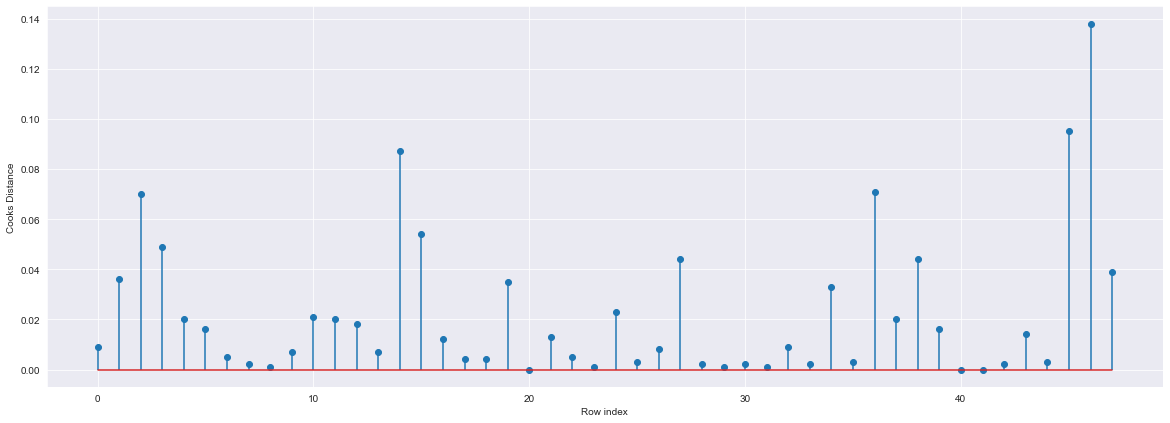

In [36]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [37]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(46, 0.13829133994334594)

In [38]:
#Drop 76 and 77 observations
startup2=startup1.drop(startup1.index[[45,46]],axis=0)

In [39]:
startup2

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
#Reset the index and re arrange the row values
startup3=startup2.reset_index()

In [41]:
startup4=startup3.drop(['index'],axis=1)

In [42]:
startup4.head(4)

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99


In [43]:
#Build the model on the new data
final_ml_V= smf.ols('Profit~Administration+RandD_Spend+Marketing_Spend',data=startup4).fit()

In [44]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

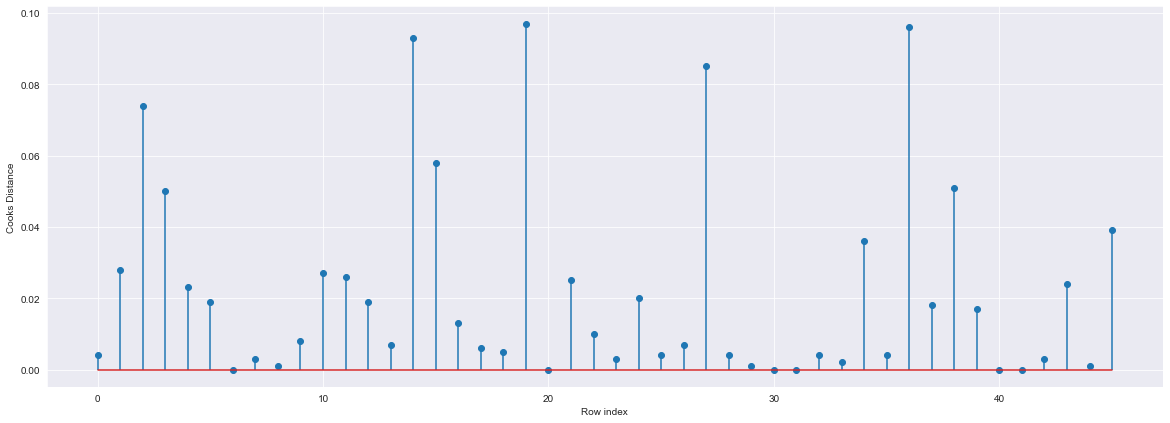

In [45]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [46]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(19, 0.09705035449315265)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [47]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Profit~Administration+RandD_Spend+Marketing_Spend',data = startup4).fit()

In [48]:
S3=(final_ml_V.rsquared,final_ml_V.aic)
print(S3)

(0.962593650298269, 950.0635928720131)


## Predicting for new data

In [49]:
#New data for prediction
new_data=pd.DataFrame({'RandD_Spend':165349.20,'Administration':136897.80, 'Marketing_Spend':471784.10},index=[1])

In [50]:
final_ml_V.predict(new_data)

1    190130.816082
dtype: float64

In [51]:
final_ml_V.predict(startup_new.iloc[0:5,])

0    190130.816082
1    186454.033293
2    181105.940730
3    172478.455896
4    171731.889275
dtype: float64

In [52]:
pred_y = final_ml_V.predict(startup_new)

In [53]:
pred_y

0     190130.816082
1     186454.033293
2     181105.940730
3     172478.455896
4     171731.889275
5     163293.596350
6     156333.582943
7     158527.845161
8     150490.249670
9     154622.003463
10    135892.747070
11    136520.630139
12    129353.312991
13    127546.705225
14    148078.790426
15    145875.403771
16    117836.611892
17    129913.739743
18    129680.589848
19    115274.967305
20    117847.576718
21    117370.573803
22    115752.397504
23    111726.995236
24    114864.567380
25    103068.605246
26    110939.390996
27    115403.943556
28    101263.275850
29    102212.734351
30    101002.047454
31     98258.804621
32    100112.145051
33    100088.382611
34     90037.566390
35     93494.964961
36     77721.253491
37     93582.736764
38     74074.195105
39     87009.589892
40     77465.588069
41     78396.902643
42     74040.884976
43     62965.464205
44     66432.565336
45     51018.183229
46     59890.279108
47     49585.256517
48     54520.760435
49     51832.371084
